In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime, timedelta

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base=automap_base()
# reflect the tables
base.prepare(autoload_with = engine)


In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement=base.classes.measurement
station=base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
most_recent_date

'2017-08-23'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Starting from the most recent data point in the database. 
most_recent_date_obj = datetime.strptime(most_recent_date, '%Y-%m-%d').date()
most_recent_date_obj

datetime.date(2017, 8, 23)

In [12]:
# Calculate the date one year from the last date in data set.
one_year_prior = most_recent_date_obj - timedelta(days=365)

In [13]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_prior).all()


In [14]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

In [15]:
# Sort the dataframe by date
df = df.sort_values(by='Date')

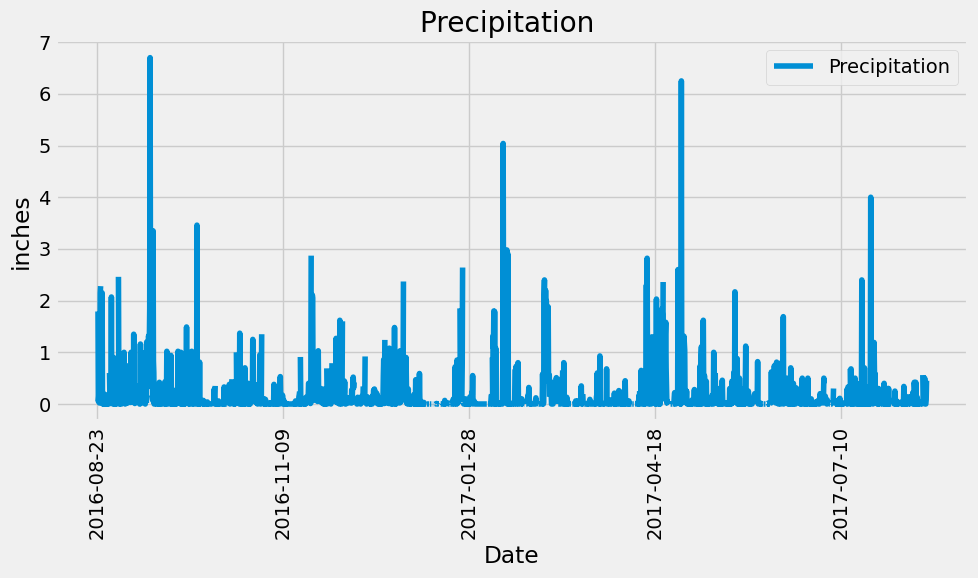

In [16]:

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation', rot=90, figsize=(10,6))
plt.title("Precipitation ")
plt.xlabel("Date")
plt.ylabel("inches")
plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df['Precipitation'].describe()
summary_statistics

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(measurement.station.distinct())).scalar()
total_stations




9

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
most_active_station = active_stations[0][0]
most_active_station 

'USC00519281'

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == most_active_station).scalar()
highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == most_active_station).scalar()
average_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active_station).scalar()


In [22]:
lowest_temp

54.0

In [23]:
highest_temp 

85.0

In [24]:
average_temp 

71.66378066378067

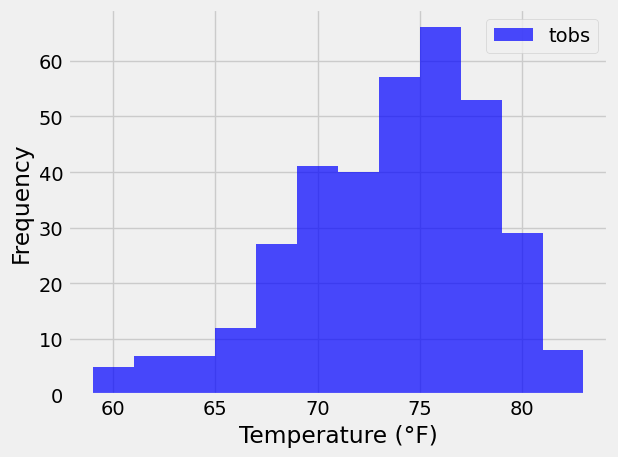

In [25]:
# Using the most active station id

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(measurement.tobs).\
    filter(measurement.date >= one_year_prior).\
    filter(measurement.station == most_active_station).all()

temperatures = [temp[0] for temp in temperature_data]

plt.hist(temperatures, bins=12, color='blue', alpha=0.7)

plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.tight_layout()
plt.show()

# Close Session

In [155]:
# Close Session
session.close()